# 🎯 Project Goal

This project analyzes a dataset collected from 40 investors. It includes information such as gender, age, investment frequency, preferred investment avenues, investment goals, and expected profitability.

The main objectives are:

1. Understand the typical age and gender of investors.
2. Identify what motivates their investments.
3. Determine their primary financial goals.
4. Classify investor profiles (e.g., conservative vs. aggressive).

By identifying patterns in behavior and preferences, this project can offer insights for personal financial strategies and the finance industry at large.


# Import Dataset and General managment Dataset

In [172]:
import pandas as pd
import numpy as np

## Load Dataset

In [173]:
finance = pd.read_csv(filepath_or_buffer = r'C:\Users\Carlos Mario\Documents\Notebook\Finance_data.csv')
finance.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [174]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

In [175]:
finance.describe()

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.800000,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000
std,3.560467,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,25.750000,2.000000,3.000000,5.000000,4.000000,2.750000,1.000000,6.000000
50%,27.000000,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000
75%,30.000000,3.000000,4.000000,7.000000,5.000000,5.000000,2.250000,7.000000
max,35.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000


### Conclusion

This is our first look at the dataset. We can observe that it contains useful attributes such as gender, age, preferred investment avenues, investment goals, and general behavioral patterns. This information was collected from a sample of 40 investors.



## Check for Missing Data

### Purpose:
Check for missing (null) values in each column to determine whether any data cleaning is needed before continuing the analysis.


In [176]:
finance.isnull().sum()

gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64

### Conclusion

The code confirms that there are no null values in any columns. Therefore, no data imputation or removal is required at this stage.


# Demographic Information

The goal of this section is to analyze key demographic data, such as age and gender, to better understand the profile of our investors.


In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('pastel')

Text(0.5, 1.0, 'Count Men and Women')

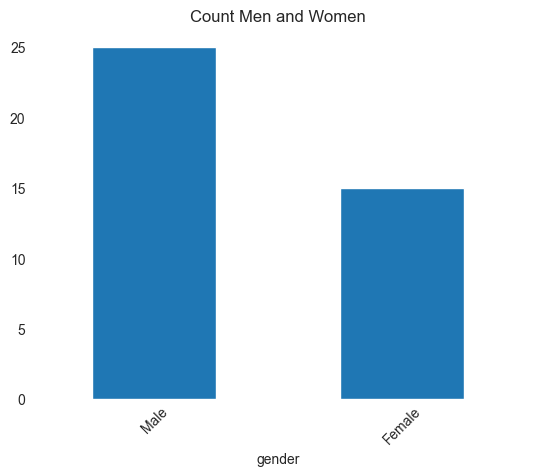

In [178]:
finance['gender'].value_counts().plot(kind='bar')
plt.xticks(rotation= 45)
plt.title('Count Men and Women')

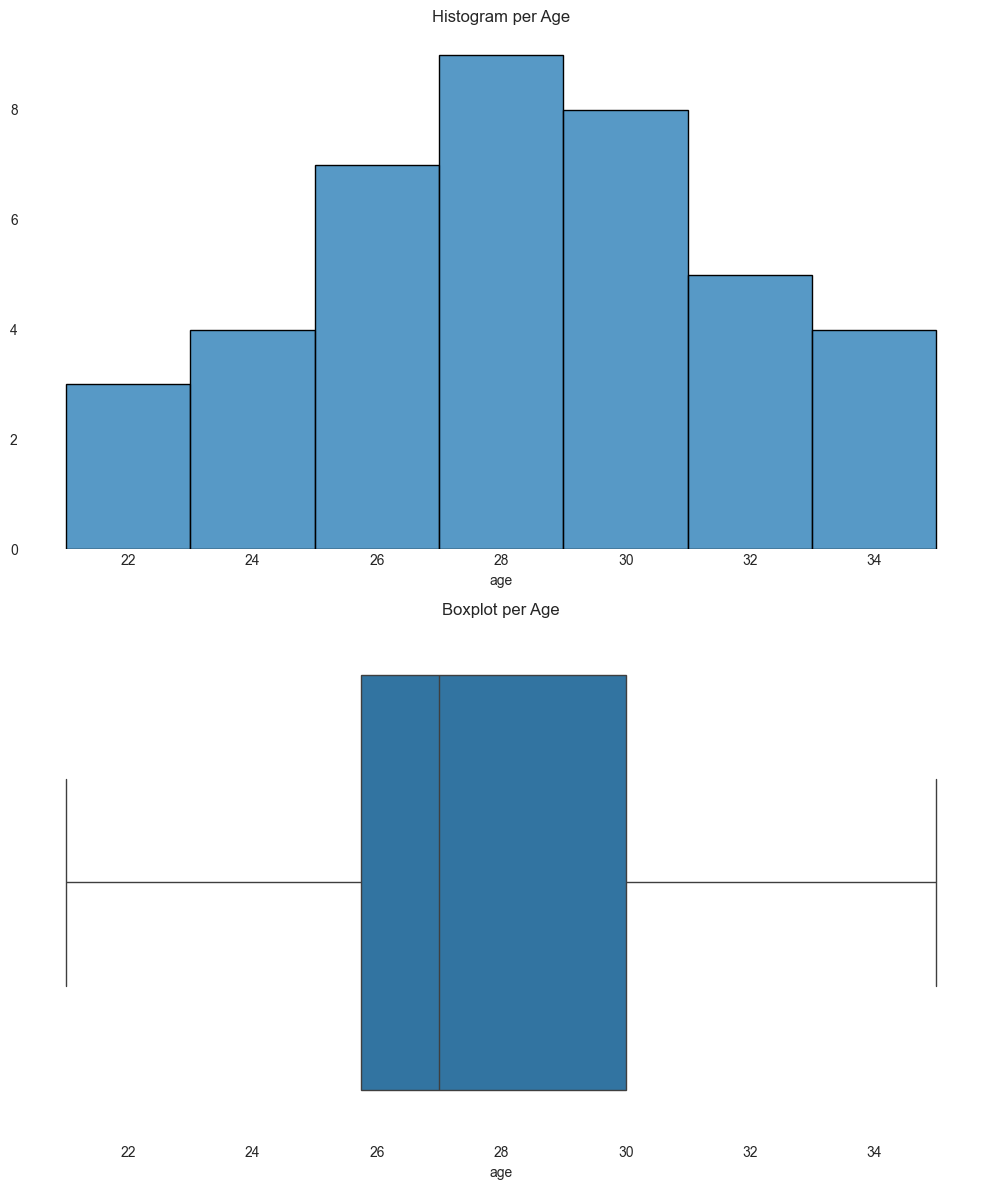

In [179]:
fig, ax = plt.subplots(2,1, figsize = (10,12))

sns.histplot(finance['age'], edgecolor = 'black', ax=ax[0])
ax[0].set_title('Histogram per Age')
ax[0].set_ylabel('')
sns.boxplot(x= finance['age'], ax = ax[1])
ax[1].set_title('Boxplot per Age')

plt.tight_layout()


In [180]:
q1 = np.quantile(finance['age'],0.25)
q2 = np.quantile(finance['age'],0.5)
q3= np.quantile(finance['age'],0.75)
qir = q3 - q1
lim_inf = q1 - qir*1.5
lim_sup = q3 + qir * 1.5

print(q1,q2,q3,qir,lim_inf, lim_sup)

25.75 27.0 30.0 4.25 19.375 36.375


In [181]:
finance.groupby('gender')['age'].mean()

gender
Female    27.733333
Male      27.840000
Name: age, dtype: float64

## Conclusion

The age range intestors is 21 - 35 years, with a mediam of 27 years and an averange of 27.8 years,25% of investor are least 25.75 only 25% people are over of 30 years old, 60% are men and 40% are women

1. 60% investor are men
2. this most common age is 28 years old
3. max age is 35 years
4. Averange age is 27.8 years old
5. Averange age per Male is 27 years old and per Famale 27 years old

# Goal our Investor
This session let's analyze what are the main goals our investor?, Why do they make decision to invest thier savings?

In [182]:
finance['age_group'] = pd.cut(finance['age'],bins = (18,24,29,35), labels = ['18 - 23', '24 - 29', '30 - 35'])

Text(0, 0.5, '')

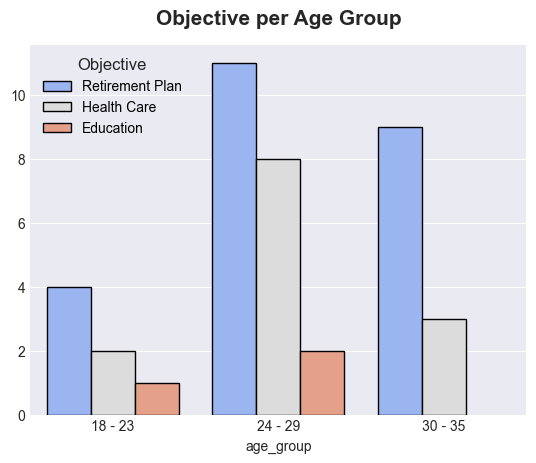

In [191]:
## Figure one objective of invesment per Age Group

sns.set_style('darkgrid')
sns.countplot(x = 'age_group', hue = 'What are your savings objectives?', data = finance, palette = 'coolwarm', edgecolor = 'black')
plt.legend(title = 'Objective', labelcolor = 'black', shadow = True, edgecolor = 'white', title_fontsize = 'large')
plt.title('Objective per Age Group', fontweight = 'bold', fontsize = 15, pad = 15 )
plt.ylabel('')



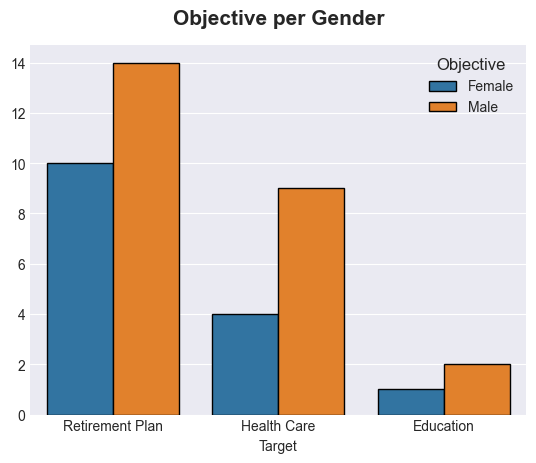

In [184]:
##Figure Two Objective Invest per Gender

sns.set_style('darkgrid')
sns.countplot(x = 'What are your savings objectives?', hue = 'gender', data = finance, edgecolor = 'black')
plt.title('Objective per Gender', fontweight = 'bold', fontsize = 15, pad = 15)
plt.xlabel('Target')
plt.ylabel('')
plt.legend(title = 'Objective', title_fontsize = 'large', edgecolor = 'black', facecolor = 'white' )

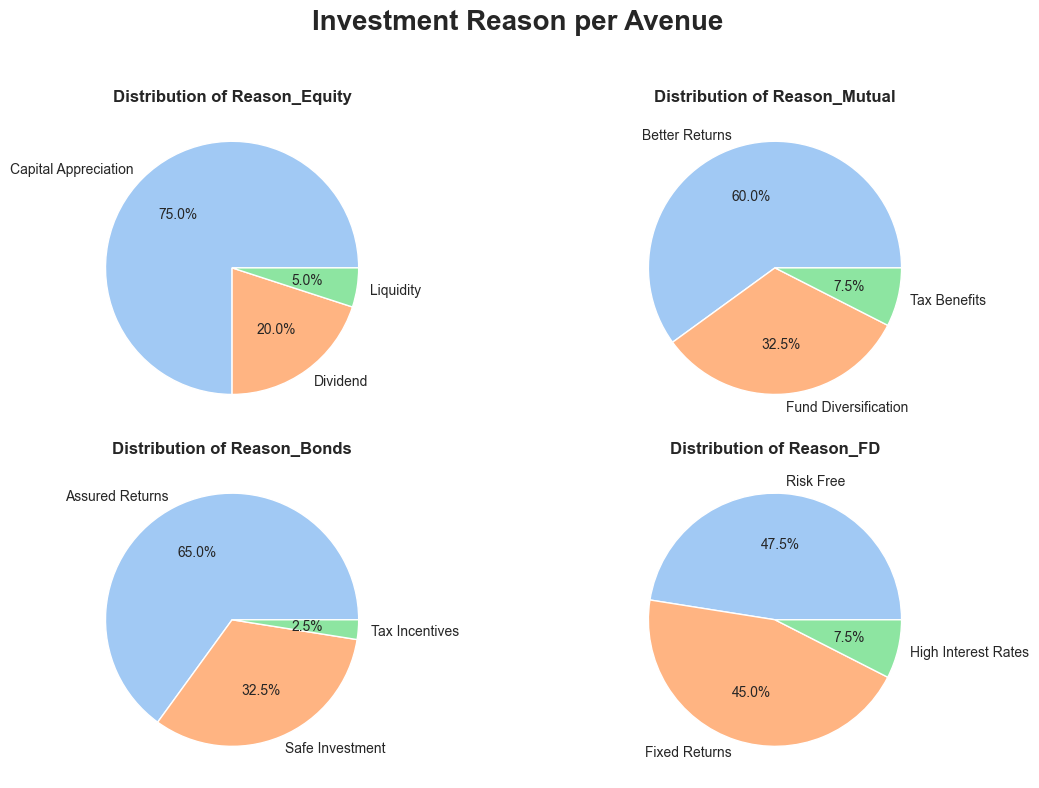

In [194]:
## Figure Three investment reason every avenue

columns = ['Reason_Equity', 'Reason_Mutual', 'Reason_Bonds','Reason_FD']
fig, axes = plt.subplots(2,2, figsize = (12,8))
sns.set_style('darkgrid')
sns.set_palette('pastel')
axes = axes.flatten()
#unique_vals = finance[columns].nunique()
#colors = sns.color_palette('Set3', unique_vals)
for i, columna in enumerate(columns):
    if i<len(axes):
        finance[columna].value_counts().plot(kind = 'pie', ax = axes[i], autopct= '%1.1f%%')
        axes[i].set_title(f'Distribution of {columna}', fontweight = 'bold')
        axes[i].set_ylabel('')
        fig.suptitle('Investment Reason per Avenue', fontweight = 'bold', fontsize = 20 )


plt.tight_layout(rect=[0, 0, 1, 0.95])


## Conclusion:

1. The primary investment objective across all age groups is retirement planning, followed by healthcare planning, and lastly, education.

The age group between 24 and 29 years old tends to invest primarily in retirement and healthcare plans. Individuals aged 30 and above focus more on retirement planning.

2. In terms of gender, the same investment objectives are prioritized as those observed across different age groups.

3. Regarding individual investment goals, we observe that most investors aim to reduce risk and increase returns. They prioritize factors such as higher yields, dividend income, risk minimization, fixed returns, and diversification.

# 📊  Investor Behavior

Text(0.5, 1.0, 'Investment Avenues')

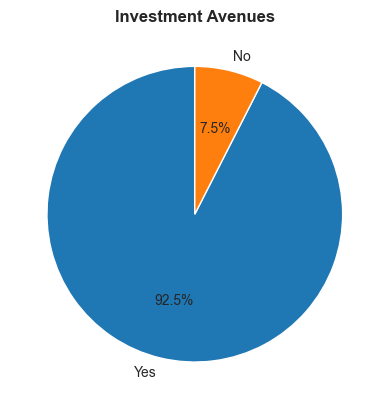

In [186]:
# Do you invest on any avenues?

count = finance['Investment_Avenues'].value_counts()
plt.pie(count, labels=finance['Investment_Avenues'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Investment Avenues', fontweight = 'bold')

Text(0, 0.5, '')

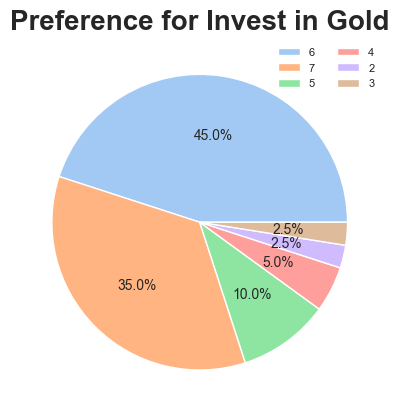

In [213]:
# have you ever invested in Gold?
finance['Gold'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels = None)
plt.title('Preference for Invest in Gold', fontweight = 'bold', fontsize = 20)
plt.legend(['6','7','5','4','2','3'], ncol = 2, loc = 'upper right', fontsize = 8, edgecolor = 'black', facecolor = 'black', shadow = True)
plt.ylabel('')

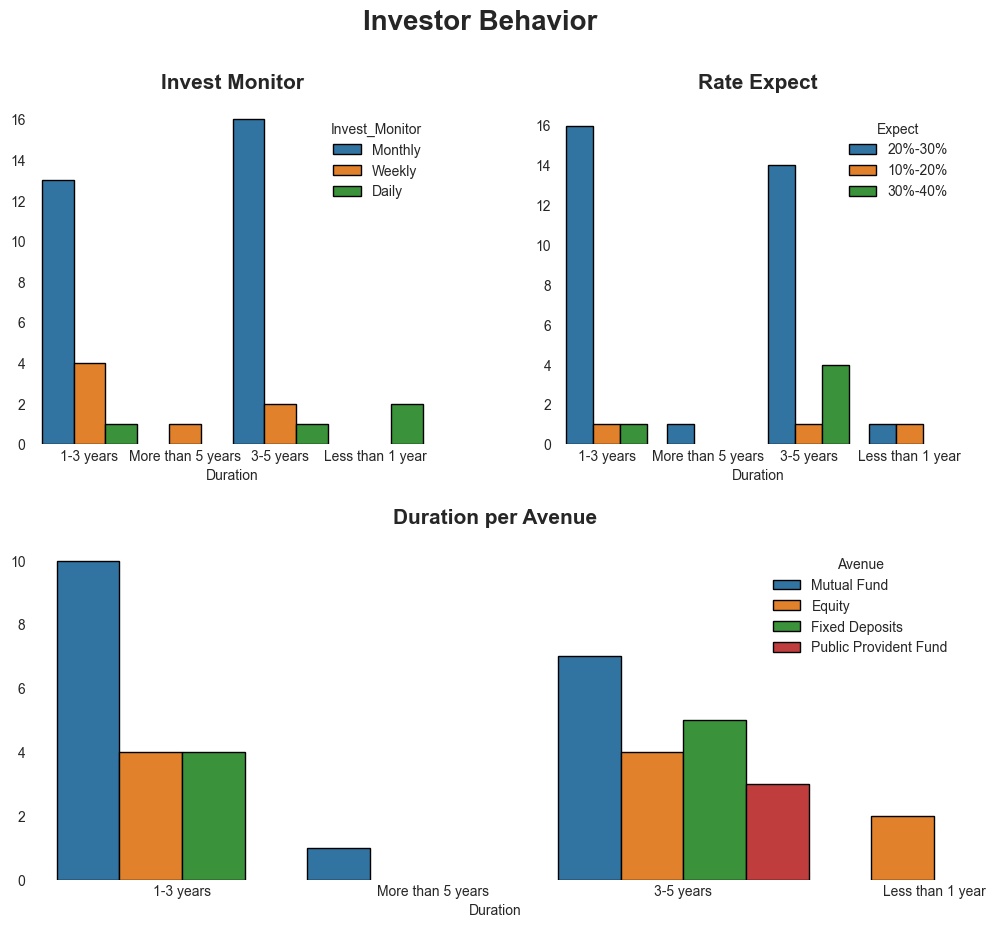

In [188]:
# Investor Behavior

fig = plt.figure(figsize = (12,10))
gs = plt.GridSpec(2,2,wspace = 0.3, hspace = 0.3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,:])

plt.suptitle('Investor Behavior', fontsize = 20, fontweight = 'bold')

#Figure 3 Duration Invest per Avenue

sns.countplot(x= 'Duration', hue = 'Avenue', data = finance, edgecolor = 'black', width = 1,ax = ax3)
plt.margins(x = 0.03)
ax3.set_title('Duration per Avenue', pad = 15, fontsize = 15, fontweight = 'bold')
plt.ylabel('')

# Figure 1 Frequently Invest Monitor

sns.countplot(x= 'Duration', hue = 'Invest_Monitor', data = finance, edgecolor = 'black', width = 1, ax = ax1)
ax1.margins(0.03)
ax1.set_title('Invest Monitor', pad = 15, fontsize = 15, fontweight = 'bold')
ax1.set_ylabel('')

# Figure 2 Investor Rate Expect

sns.countplot(x = 'Duration', hue = 'Expect', data = finance, edgecolor = 'black', ax = ax2)
ax2.set_title('Rate Expect', pad = 15, fontsize = 15, fontweight = 'bold')
ax2.set_ylabel('')

plt.show()



## Conclusion
1. An overwhelming 93% of investors utilize at least one investment avenue (such as mutual funds, equity, or fixed deposits) as their primary method of investing, indicating a strong preference for structured financial instruments over informal or alternative methods.
   
2. Investors who plan to invest for 1 to 5 years tend to monitor their investments on a monthly basis, showing a balanced level of engagement.
In contrast, those with long-term horizons (more than 5 years) surprisingly monitor their portfolios more frequently—on a weekly basis. This may suggest a high level of commitment or concern about long-term performance.
Meanwhile, short-term investors (less than 1 year) tend to track their investments daily, which aligns with the higher volatility and urgency often associated with short-term gains.

3. Investors with an investment horizon of 1 to 5 years most commonly expect returns in the range of 20% to 30%, followed closely by expectations of 30% to 40%.
Those with a long-term perspective (more than 5 years) also primarily expect returns between 20% and 30%, indicating a stable and realistic outlook despite the longer time frame.
On the other hand, short-term investors (less than 1 year) have more modest expectations, generally aiming for returns between 10% and 30%.

4. Short-term investors (1 to 3 years) tend to prefer mutual funds as their primary investment avenue, followed by equity and fixed deposits.
Those who plan to invest for 3 to 5 years also show a strong preference for mutual funds, with fixed deposits and equity closely behind.
Long-term investors (more than 5 years) exclusively favor mutual funds, possibly due to their potential for long-term growth and diversification.
Interestingly, short-duration investors (less than 1 year) show a distinct preference for equity, likely seeking quick returns despite higher volatility.

5. Nearly 90% of investors in the dataset have invested in gold at least once, suggesting that a large majority view gold as a safe and reliable store of value. This behavior indicates a preference for preserving capital and protecting their savings against market volatility or inflation.